In [1]:
import pandas as pd

In [2]:
from scipy import stats
import numpy as np

실습문제1

In [3]:
#정규성 검정하기
df = pd.read_csv('/home/piai/바탕화면/1 Big Data 분석 기초/2sample_t_test.csv')
df.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [4]:
#데이터 프레임 분리하고 결측값 제거
Mat_A = df['Mat_A']
Mat_B = df['Mat_B']
Mat_A.dropna(inplace=True)
Mat_B.dropna(inplace=True)

In [5]:
#변수 A의 정규성 검정(95% 신뢰수준 사용)
s, p = stats.shapiro(Mat_A)
print("p-value: ",p)
#p-value가 0.05보다 작으므로 비정규로 판단

p-value:  0.2563020884990692


In [6]:
#변수 B의 정규성 검정(95% 신뢰수준 사용)
s, p = stats.shapiro(Mat_B)
print("p-value: ",p)
#p-value가 0.05보다 크므로 정규로 판단

p-value:  0.9169775247573853


실습문제2

In [7]:
#모평균 구간 탐색
#데이터프레임 생성
df = pd.DataFrame({'size':[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
df.head()

,size
0,18
1,18
2,20
3,21
4,20


In [8]:
#정규분포 구간 측정 함수를 실행한다
#조건: 95%의 신뢰구간, 모표준편차: 3.8, n=20
lower, upper = stats.norm.interval(0.95,loc=np.mean(df),scale=3.8/np.sqrt(20))
print("신뢰구간:({},{})".format(lower.round(2),upper.round(2)))

신뢰구간:([17.83],[21.17])


/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


실습문제3

In [9]:
import scipy

In [10]:
#모표준편차를 모르는 경우의 모평균 신뢰구간 측정
#조건: 모평균=70, n=20, 표본평균=71.5, 표본표준편차=1.933, 95%의 신뢰구간
#데이터프레임 생성
df = pd.DataFrame({'data':[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})
#정규분포 구간 추정 함수 실행
lower, upper = stats.t.interval(0.95,len(df)-1,loc=np.mean(df),scale=scipy.stats.sem(df))
print("신뢰구간:({},{})".format(lower.round(2),upper.round(2)))

신뢰구간:([70.6],[72.4])


실습문제4

In [11]:
# 1-Sample t-test
#귀무가설: 개선활동이 만족도를 변화시키지 못했다.
#조건: 평균=78, n=10, 0.05의 유의수준
#데이터프레임 생성
df = pd.DataFrame({'data':[85,79,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})
x = 78
n = 10
t_result=stats.ttest_1samp(df,x)
#t값과 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
#결과 값 출력
print("1-Sample t-test")
print("t통계량: ",t)
print("p-value: ",p)
#p-value가 유의수준보다 크기 때문에 귀무가설을 채택한다
#개선활동이 만족도를 변화시키지 못했다

1-Sample t-test
t통계량:  [3.379]
p-value:  [0.008]


실습문제5

A의 정규성은
statistic=0.8425754904747009, p-value=0.08004532009363174
B의 정규성은
statistic=0.7734811902046204, p-value=0.014793740585446358


BartlettResult(statistic=0.42411436523132123, pvalue=0.5148911629500761)

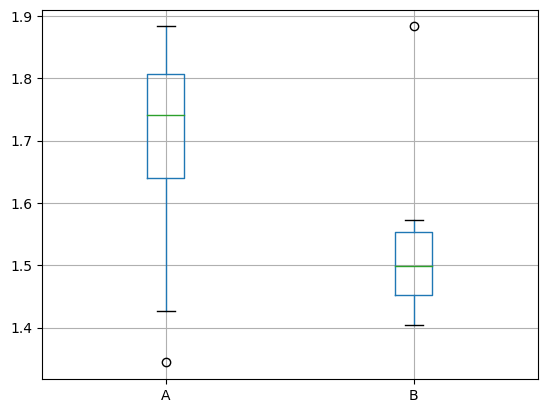

In [12]:
# 2-Sample t-test: 두 집단 간 평균이 같은지 비교한다
#귀무가설: A공급자와 B공급자의 제품 두께에 차이가 없다
#조건: n=8, 유의수준=0.05
#데이터 프레임 생성
df = pd.DataFrame({'A':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344],
                 'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})
#그룹별 boxplot
df.boxplot(['A','B'])
#A,B 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['A'])
print('A의 정규성은')
print("statistic={}, p-value={}".format(statistic,p))
statistic, p = stats.shapiro(df['B'])
print('B의 정규성은')
print("statistic={}, p-value={}".format(statistic,p))
#등분산성 검정
stats.bartlett(df['A'],df['B'])
#p-value가 0.05보다 크기 때문에 등분산성이 만족되어 비교가 가능하다

In [13]:
#2-Sample t-test
t_result = stats.ttest_ind(df['A'],df['B'])
#2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
#t, p 값 출력
print("2-Sample t-test \n t: {} \n p: {}".format(t,p))
#p값이 유의수준보다 작기 때문에 대립가설을 채택한다
#그러므로 공급자간에 차이가 존재한다

2-Sample t-test 
 t: 1.7 
 p: 0.111


실습문제6

In [14]:
#Paired t-test
#조건: n=10
#귀무가설: 회사원들의 성적은 학원가기 전후에 차이가 없다
#데이터 프레임 생성
df = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648],
                   'after':[710,580,787,712,750,600,782,670,790,680]})
#paired t-test
t_result = stats.ttest_rel(df['before'],df['after'])
#paired t-test의 t, p 값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(4)
print("Paired t-test \n t:{} \n p:{}".format(t,p))
#p-value 값이 유의수준 이하이기 때문에 대립가설을 채택한다
#그러므로 학원가기 전후에 대해 차이가 있다

Paired t-test 
 t:-2.266 
 p:0.0497


실습문제7

In [15]:
from statsmodels.stats.proportion import proportions_ztest

In [16]:
#Proportion test
#조건: 확률:0.5, n=100 , 사건관측회수=60
#귀무가설: 동전은 정상이다 -> 'p=0.5' 이다
#변수 선언
count = 40
n_obs = 100
value = 0.5
#Proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)
#결과 출력
print("1 Proprotion test \n z:{} \n p:{}".format(stat,pval))
#p-value 값이 유의수준 이하이기 때문에 대립가설을 채택한다
#그러므로 동전이 비정상이다

1 Proprotion test 
 z:-2.0412414523193148 
 p:0.0412268333371637


실습문제8

In [17]:
#2 Proportion test
#조건1: 공장A, n=1200, x=14
#조건2: 공장B, n=1200, x=5
#귀무가설: 불량률은 같다 -> 'p1 = p2' 이다
#변수 선언
count = np.array([14,5])
nobs = np.array([1200,1200])
#Proportion test 실행
stat, pval = proportions_ztest(count, nobs)
#결과 출력
print("2 Proportion test \n z:{} \n p:{}".format(stat,pval))
#p-value 값이 유의수준 이하이기 때문에 대립가설을 채택한다
#그러므로 두 공장의 불량률은 차이가 있다

2 Proportion test 
 z:2.0729633895345208 
 p:0.03817568685216671


실습문제9

In [18]:
#카이제곱 검정
#귀무가설: 각 제품에 대해 이미지에 대한 차이가 없다
#데이터프레임 생성
df = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4],'C':[4,1,3,4,9,5,4],
                   'D':[4,1,2,3,2,7,3],'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})
#chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)
#결과 출력
print("chi-square test \n chisq:{0:0.3f} \n p-value:{1:0.3f} \n degree pf freedom:{2} \n expected value: \n {3}".
      format(chi,pval,dof,expected.round(3)))
#p-value 값이 유의수준 이하이기 때문에 대립가설을 채택한다
#그러므로 각 제품에 대해 이미지에 대한 차이가 존재한다

chi-square test 
 chisq:98.274 
 p-value:0.000 
 degree pf freedom:30 
 expected value: 
 [[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


실습문제10

In [19]:
#ANOVA
#귀무가설: 강종별과 type에 따른 2차 정련 시간에 차이가 없다
#데이터 프레임 읽어오기
df = pd.read_csv('/home/piai/바탕화면/1 Big Data 분석 기초/ANOVA.csv')
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


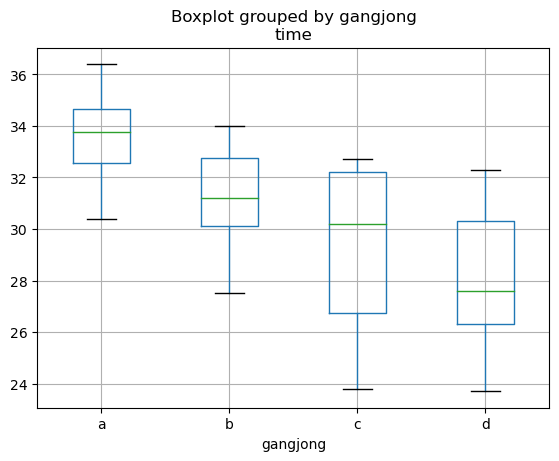

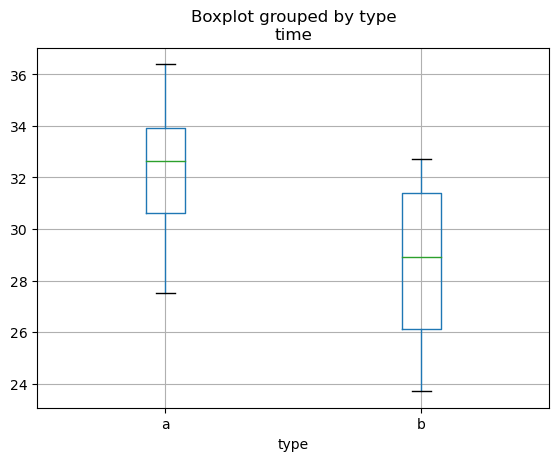

In [20]:
import matplotlib.pyplot as plt
#그룹별 boxplot
df = df[['time','gangjong','type']]
df.boxplot('time','gangjong')
df.boxplot('time','type')
plt.show()

In [21]:
#강종별 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df[df['gangjong']=='a']['time'])
print('강종 a의 정규성 검정')
print("statistic={}, p-value={}".format(statistic, p))
statistic, p = stats.shapiro(df[df['gangjong']=='b']['time'])
print('강종 b의 정규성 검정')
print("statistic={}, p-value={}".format(statistic, p))
statistic, p = stats.shapiro(df[df['gangjong']=='c']['time'])
print('강종 c의 정규성 검정')
print("statistic={}, p-value={}".format(statistic, p))
statistic, p = stats.shapiro(df[df['gangjong']=='d']['time'])
print('강종 d의 정규성 검정')
print("statistic={}, p-value={}".format(statistic, p))
#강종 a,b,c는 유의수준 이상이므로 정규성을 충족한다
#강종별 등분산성 검정: Leven Test
print()
print(stats.levene(df[df['gangjong']=='a']['time'],df[df['gangjong']=='b']['time'],df[df['gangjong']=='c']['time'],df[df['gangjong']=='d']['time']))
#p-value가 0.05 이상이므로 등분산성을 충족한다
#ANOVA 실행
f_result = stats.f_oneway(df[df['gangjong']=='a']['time'],df[df['gangjong']=='b']['time'],df[df['gangjong']=='c']['time'],df[df['gangjong']=='d']['time'])
#ANOVA의 f,p 값 저장
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)
print()
print("One-way \n F 통계량: {} \n p-value: {}".format(f,p))
#p-value가 유의수준 이상이므로 귀무가설을 채택한다
#강종별 2차 정련 시간에 차이가 없다

강종 a의 정규성 검정
statistic=0.9879403114318848, p-value=0.983557939529419
강종 b의 정규성 검정
statistic=0.9769707918167114, p-value=0.9355478286743164
강종 c의 정규성 검정
statistic=0.8929420113563538, p-value=0.3338908553123474
강종 d의 정규성 검정
statistic=0.9713904857635498, p-value=0.901641845703125

LeveneResult(statistic=0.9417495009041227, pvalue=0.4390899931524723)

One-way 
 F 통계량: 4.172 
 p-value: 0.019


In [22]:
#타입별 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df[df['type']=='a']['time'])
print('타입 a의 정규성 검정')
print("statistic={}, p-value={}".format(statistic, p))
statistic, p = stats.shapiro(df[df['type']=='b']['time'])
print('타입 b의 정규성 검정')
print("statistic={}, p-value={}".format(statistic, p))
#타입 a,b는 유의수준 이상이므로 정규성을 충족한다
#타입별 등분산성 검정: Leven Test
print()
print(stats.levene(df[df['type']=='a']['time'],df[df['type']=='b']['time']))
#p-value가 0.05 이상이므로 등분산성을 충족한다
#ANOVA 실행
f_result = stats.f_oneway(df[df['type']=='a']['time'],df[df['type']=='b']['time'])
#ANOVA의 f,p 값 저장
f, p = f_result.statistic.round(3), f_result.pvalue.round(4)
print()
print("One-way \n F 통계량: {} \n p-value: {}".format(f,p))
#p-value가 유의수준 이상이므로 귀무가설을 채택한다
#타입별 2차 정련 시간에 차이가 없다

타입 a의 정규성 검정
statistic=0.982139527797699, p-value=0.9907686114311218
타입 b의 정규성 검정
statistic=0.9098271131515503, p-value=0.2122616022825241

LeveneResult(statistic=2.1557191195451235, pvalue=0.1561933555382328)

One-way 
 F 통계량: 9.654 
 p-value: 0.0051


실습문제11

In [23]:
#Correlation Analysis
#귀무가설: 초코칩의 강도와 재료 반죽온도간에 관계가 없다
#데이터프레임 생성
df = pd.DataFrame({'strength':[37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.6,38.1,39,36.9,36.8,37.6,33,33.5],
                  'temperature':[14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]})
#Correlation Analysis 실행
corr, pval = stats.pearsonr(df['strength'],df['temperature'])
#결과 출력
print("Correlation Analysis \n corr:{} \n p-value:{}".format(corr,pval))
#p-value값이 유의수준 이하이기 때문에 대립가설을 채택한다
#초코칩의 강도와 재료 반죽온도간에 상관관계가 있다
#corr이 -0.7이기 때문에 음의 상관관계가 있다

Correlation Analysis 
 corr:-0.7151827488780785 
 p-value:0.0003934365837041942
